In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats as st
from scipy.stats import shapiro
from scipy. stats import boxcox 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate


# Домашнее задание

In [366]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [367]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [368]:
df.drop_duplicates()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

In [369]:
df.info() #нам повезло, все значения заполнены, нулевых нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [370]:
df['battery-capacity'].value_counts()

battery-capacity
-1.00     43093
 75.00        9
 27.20        7
 14.10        6
 22.00        6
          ...  
 33.00        1
 64.00        1
 32.60        1
 9.27         1
 71.00        1
Name: count, Length: 75, dtype: int64

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [372]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=53)

# Обработка значений со аномальным значением -1

In [373]:
train_X[train_X['battery-capacity']==-1]

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male
23686,33561,3,-1.0,34544,-1.00,13.2,3,6,4,2011,...,1582.0,4,1,17,77.0,2016.0,15,3,0,1
14866,21122,4,-1.0,32117,8.75,-1.0,0,4,0,1971,...,1316.0,1,2,13,65.0,1976.0,9,3,0,1
9374,13370,1,-1.0,38202,8.50,13.1,3,7,0,1977,...,1486.0,1,2,13,74.0,1989.0,35,3,0,1
31370,44446,1,-1.0,27856,7.80,-1.0,0,6,0,1975,...,1350.0,2,2,8,-1.0,1984.0,16,3,0,1
18165,25805,3,-1.0,29760,9.50,7.7,0,4,4,1993,...,1450.0,4,2,13,60.0,1998.0,16,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,33063,8,-1.0,38936,10.50,4.9,0,4,2,2012,...,1514.0,4,1,13,50.0,2016.0,10,3,0,1
37364,52942,8,-1.0,3809,9.20,-1.0,0,4,1,1989,...,1405.0,1,2,13,-1.0,1993.0,10,3,0,1
8854,12595,3,-1.0,39018,9.30,8.3,0,4,4,2002,...,1526.0,4,1,13,70.0,2006.0,10,3,0,1
19645,27862,4,-1.0,32040,8.50,-1.0,0,4,0,1961,...,1315.0,2,2,13,65.0,1973.0,9,3,0,1


In [374]:
#1 battery-capacity (!) слишклм много пропущенных значений, надо удалять столбец
train_X.loc[train_X["battery-capacity"] == -1, "battery-capacity"] = np.NaN
test_X.loc[test_X["battery-capacity"] == -1, "battery-capacity"] = np.NaN


#2 compression
train_X.loc[train_X["compression"] == -1, "compression"] = np.NaN
test_X.loc[test_X["compression"] == -1, "compression"] = np.NaN

#3 power-electro-kw (!) слишклм много пропущенных значений, надо удалять столбец
train_X.loc[train_X["power-electro-kw"] == -1, "power-electro-kw"] = np.NaN
test_X.loc[test_X["power-electro-kw"] == -1, "power-electro-kw"] = np.NaN

#4 weight
train_X.loc[train_X["weight"] == -1, "weight"] = np.NaN
test_X.loc[test_X["weight"] == -1, "weight"] = np.NaN

#5 configurations_tank-volume
train_X.loc[train_X["configurations_tank-volume"] == -1, "configurations_tank-volume"] = np.NaN
test_X.loc[test_X["configurations_tank-volume"] == -1, "configurations_tank-volume"] = np.NaN

#7 supergen_year-stop
train_X.loc[train_X["supergen_year-stop"] == -1, "supergen_year-stop"] = 2024
test_X.loc[test_X["supergen_year-stop"] == -1, "supergen_year-stop"] = 2024

#5 configurations_tank-volume
train_X.loc[train_X["configurations_back-wheel-base"] == -1, "configurations_back-wheel-base"] = np.NaN
test_X.loc[test_X["configurations_back-wheel-base"] == -1, "configurations_back-wheel-base"] = np.NaN

<Axes: >

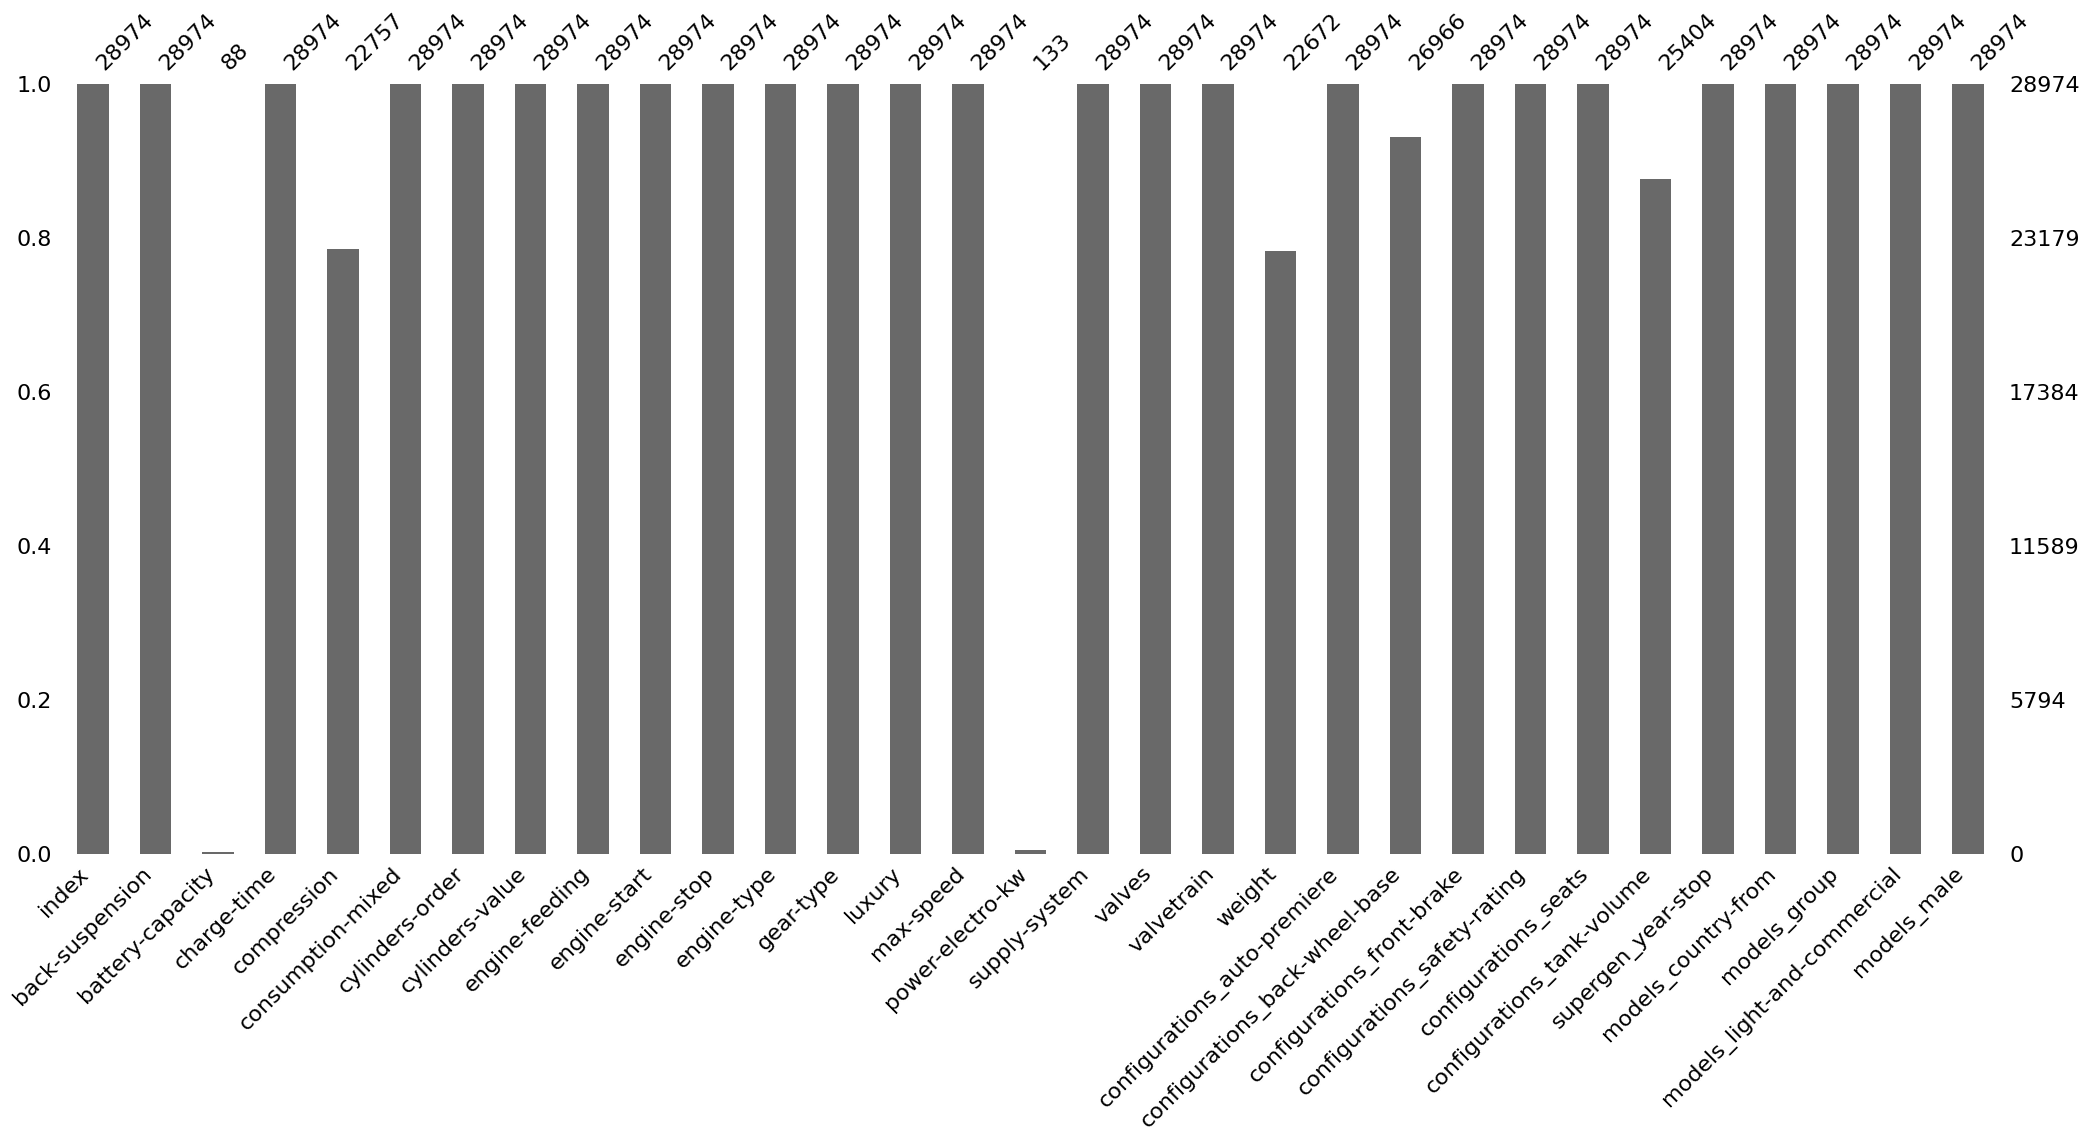

In [375]:
import missingno as msno
msno.bar(train_X) #визуализация незаполненных данных
#Столбцы с batery-capacity и power-electro-kw удаляем

In [376]:
test_X = test_X.drop('battery-capacity', axis=1)
train_X = train_X.drop('battery-capacity', axis=1)

test_X = test_X.drop('power-electro-kw', axis=1)
train_X = train_X.drop('power-electro-kw', axis=1)

In [377]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14271 entries, 10257 to 14089
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           14271 non-null  int64  
 1   back-suspension                 14271 non-null  int64  
 2   charge-time                     14271 non-null  int64  
 3   compression                     11168 non-null  float64
 4   consumption-mixed               14271 non-null  float64
 5   cylinders-order                 14271 non-null  int64  
 6   cylinders-value                 14271 non-null  int64  
 7   engine-feeding                  14271 non-null  int64  
 8   engine-start                    14271 non-null  int64  
 9   engine-stop                     14271 non-null  int64  
 10  engine-type                     14271 non-null  int64  
 11  gear-type                       14271 non-null  int64  
 12  luxury                          1

In [378]:
#2 compression
train_X['median_2'] = train_X.groupby(['models_country-from'])['compression'].transform('median')
test_X['median_2'] = test_X.groupby(['models_country-from'])['compression'].transform('median')
train_X['compression'] = train_X['compression'].fillna(train_X['median_2'])
test_X['compression'] = test_X['compression'].fillna(test_X['median_2'])

In [379]:
#4 weight
train_X['median_4'] = train_X.groupby(['models_country-from'])['weight'].transform('median')
test_X['median_4'] = test_X.groupby(['models_country-from'])['weight'].transform('median')
train_X['weight'] = train_X['weight'].fillna(train_X['median_4'])
test_X['weight'] = test_X['weight'].fillna(test_X['median_4'])

In [380]:
#5 configurations_tank-volume
train_X['median_5'] = train_X.groupby(['models_country-from'])['configurations_tank-volume'].transform('median')
test_X['median_5'] = test_X.groupby(['models_country-from'])['configurations_tank-volume'].transform('median')
train_X['configurations_tank-volume'] = train_X['configurations_tank-volume'].fillna(train_X['median_5'])
test_X['configurations_tank-volume'] = test_X['configurations_tank-volume'].fillna(test_X['median_5'])

In [381]:
#6 engine-stop
train_X['engine-stop'] = train_X['engine-stop'].replace(0, 2024)
test_X['engine-stop'] = test_X['engine-stop'].replace(0, 2024)

In [382]:
#7 configurations_back-wheel-base
train_X['median_6'] = train_X.groupby(['models_country-from'])['configurations_back-wheel-base'].transform('median')
test_X['median_6'] = test_X.groupby(['models_country-from'])['configurations_back-wheel-base'].transform('median')
train_X['configurations_back-wheel-base'] = train_X['configurations_back-wheel-base'].fillna(train_X['median_6'])
test_X['configurations_back-wheel-base'] = test_X['configurations_back-wheel-base'].fillna(test_X['median_6'])

<Axes: >

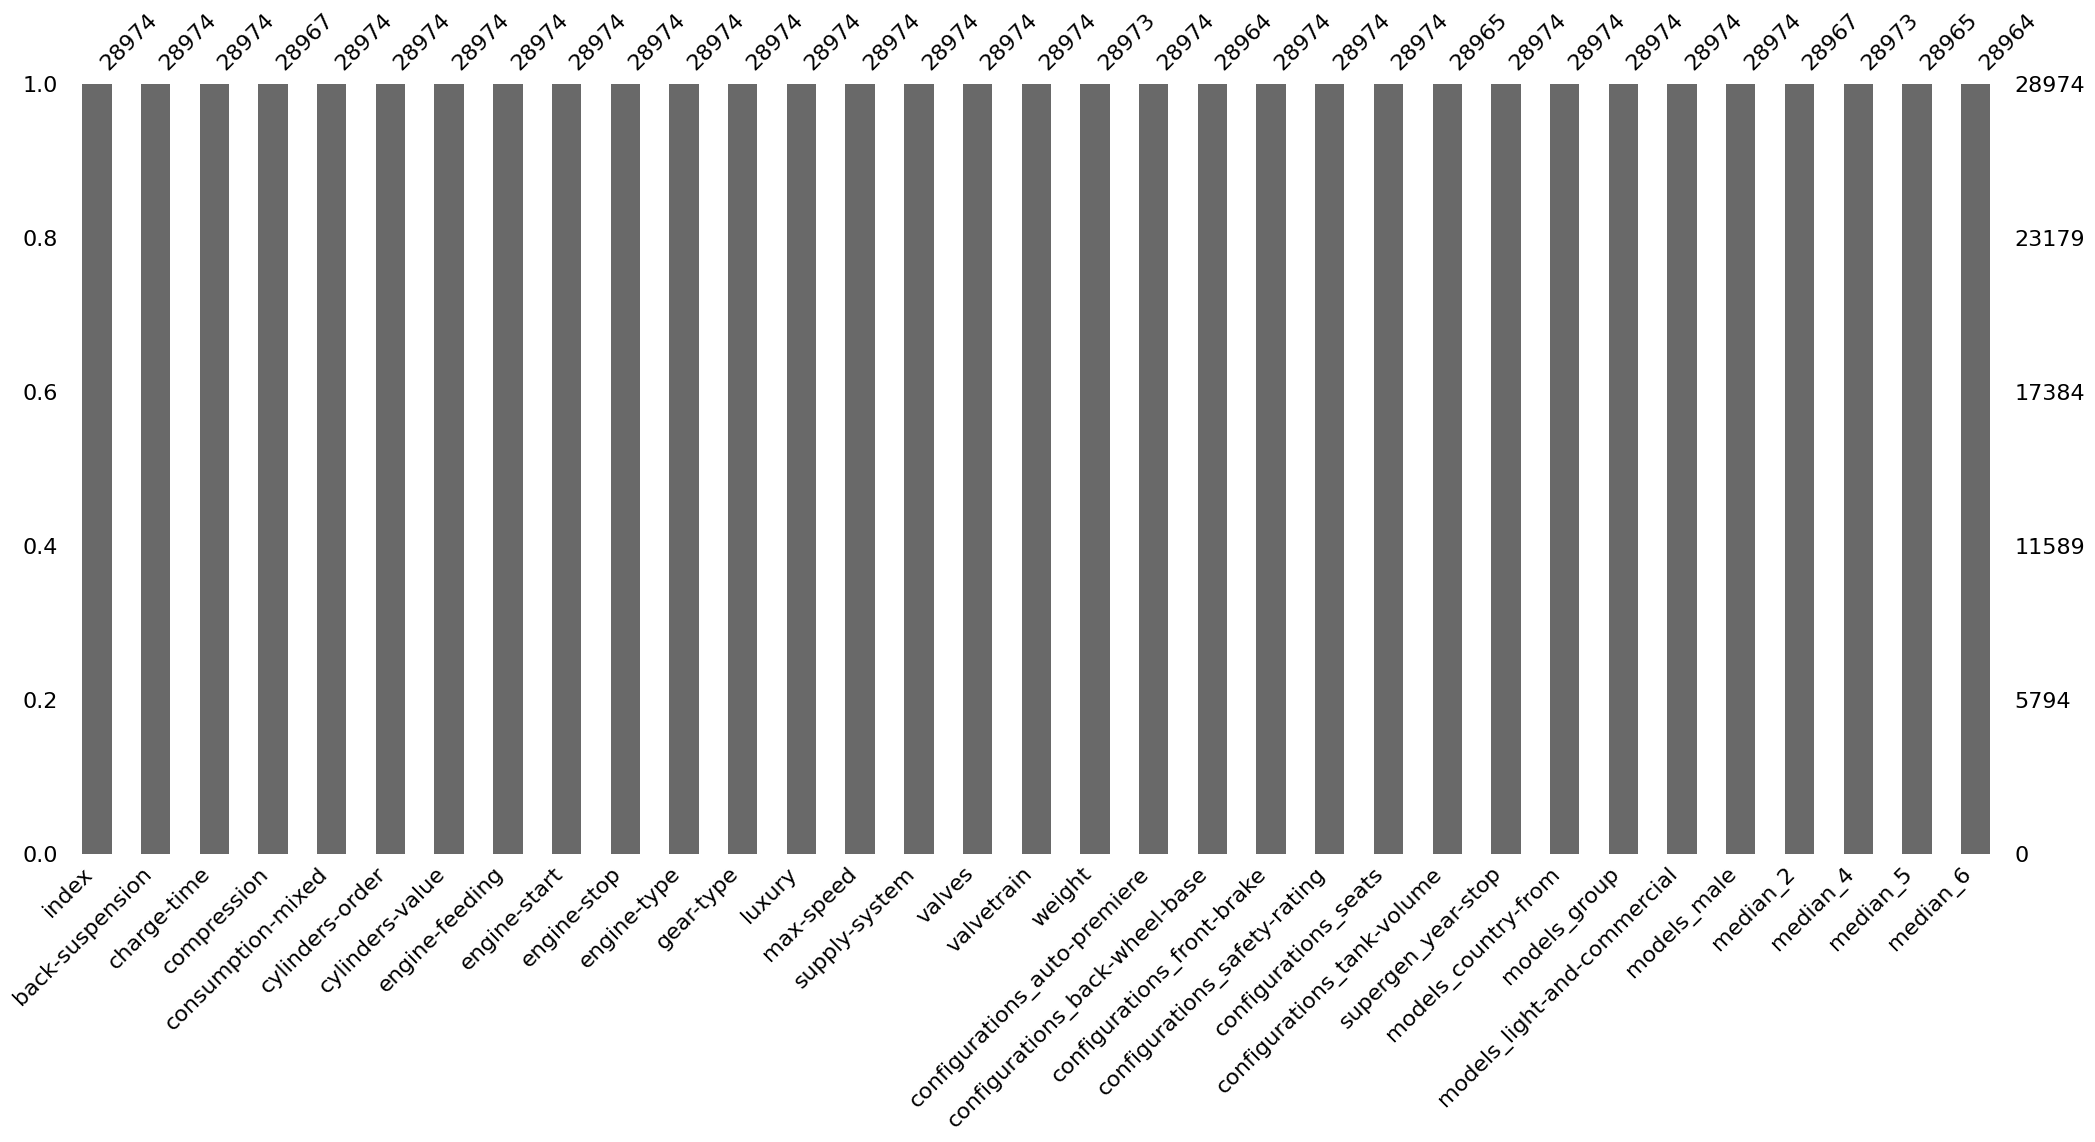

In [383]:
msno.bar(train_X) #визуализация незаполненных данных

In [384]:
test_X['compression'] = test_X['compression'].fillna(test_X['compression'].median())
test_X['weight'] = test_X['weight'].fillna(test_X['weight'].median())
test_X['configurations_tank-volume'] = test_X['configurations_tank-volume'].fillna(test_X['configurations_tank-volume'].median())
test_X['configurations_back-wheel-base'] = test_X['configurations_back-wheel-base'].fillna(test_X['configurations_back-wheel-base'].median())

In [385]:
train_X['compression'] = train_X['compression'].fillna(train_X['compression'].median())
train_X['weight'] = train_X['weight'].fillna(train_X['weight'].median())
train_X['configurations_tank-volume'] = train_X['configurations_tank-volume'].fillna(train_X['configurations_tank-volume'].median())
train_X['configurations_back-wheel-base'] = train_X['configurations_back-wheel-base'].fillna(train_X['configurations_back-wheel-base'].median())

In [386]:
test_X = test_X.drop('median_2', axis=1)
train_X = train_X.drop('median_2', axis=1)

test_X = test_X.drop('median_4', axis=1)
train_X = train_X.drop('median_4', axis=1)

test_X = test_X.drop('median_5', axis=1)
train_X = train_X.drop('median_5', axis=1)

test_X = test_X.drop('median_6', axis=1)
train_X = train_X.drop('median_6', axis=1)

<Axes: >

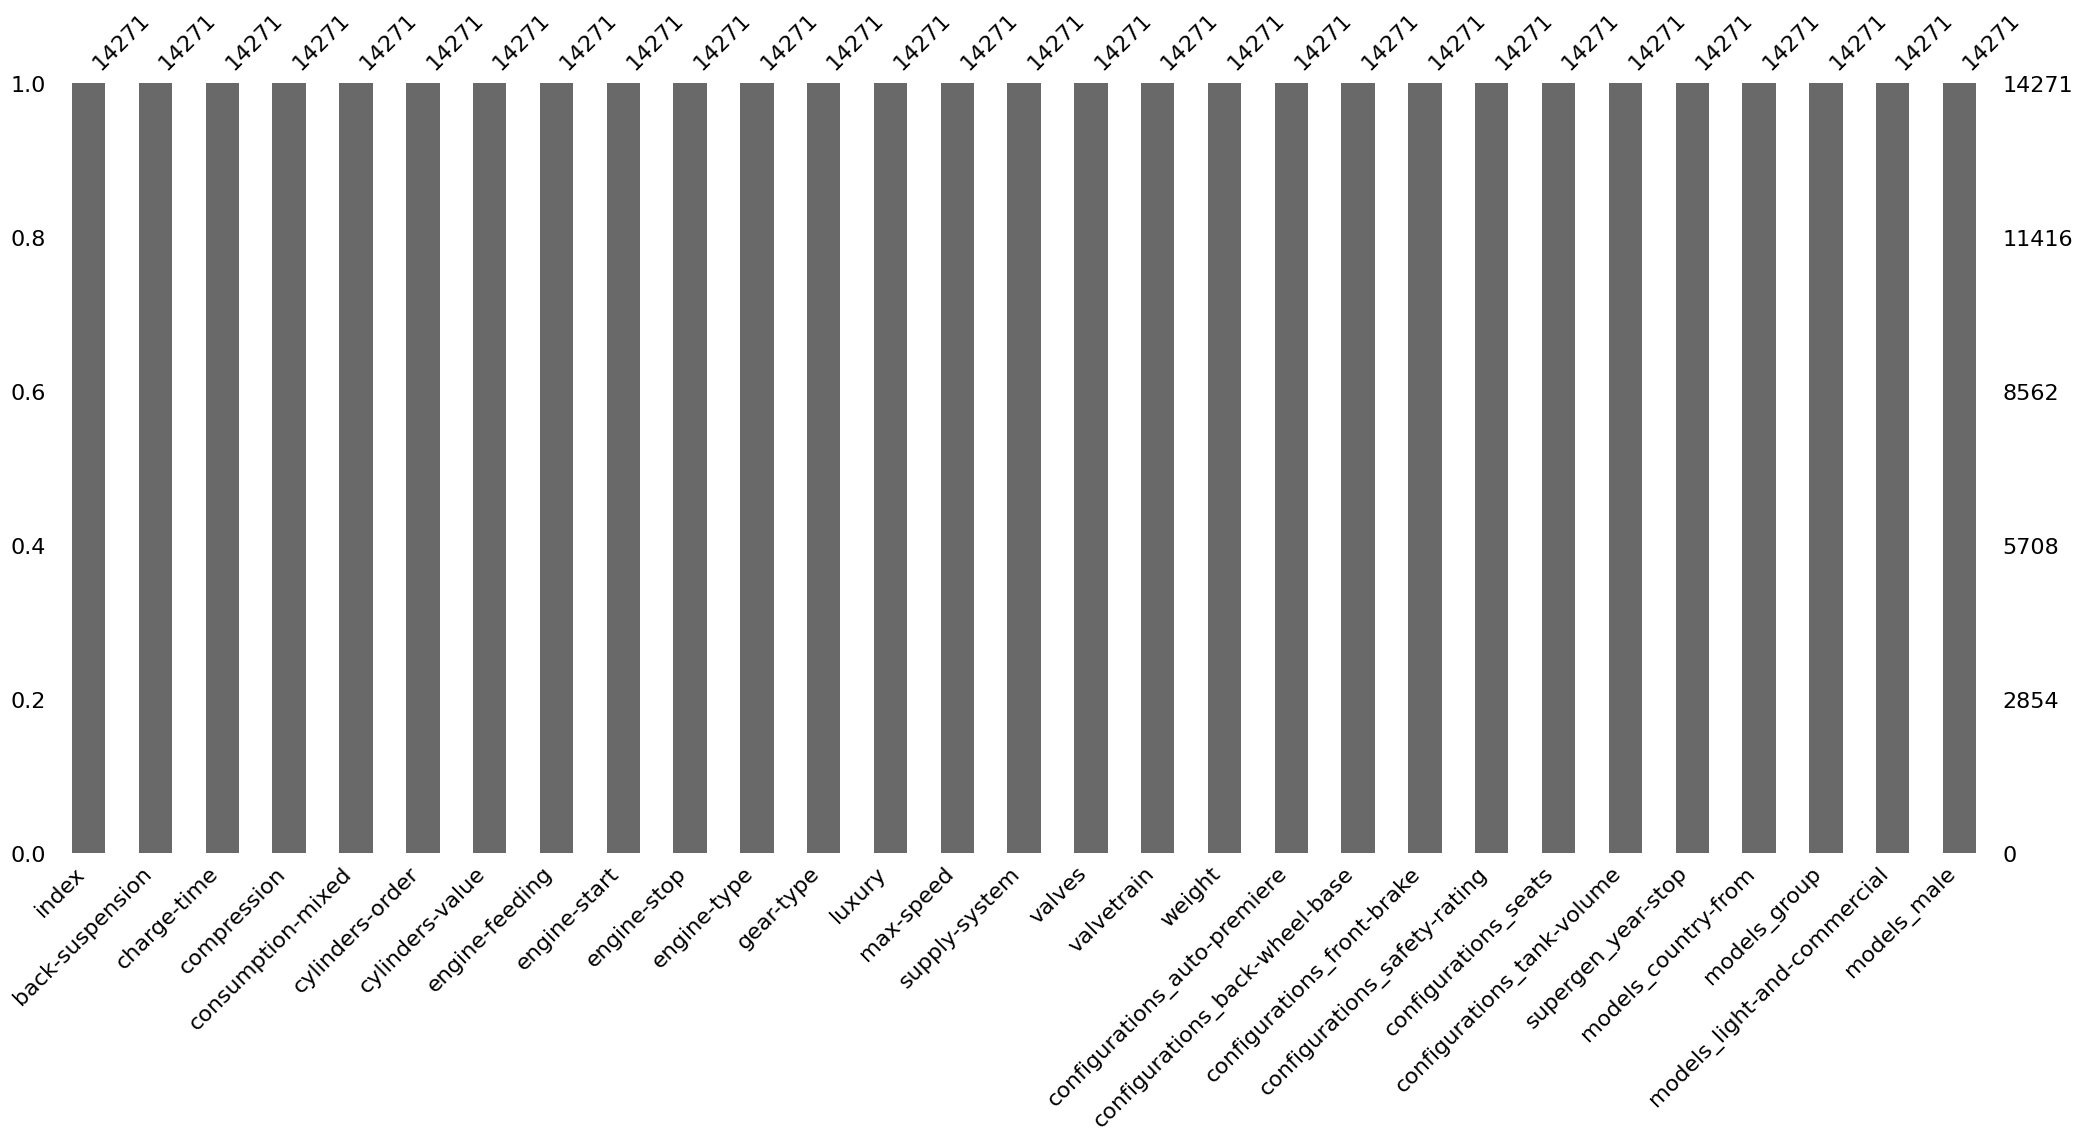

In [387]:
msno.bar(test_X) #визуализация незаполненных данных

# Проверка формы распределения данных. Выбросы. Гистограммы распределения. Нормальность

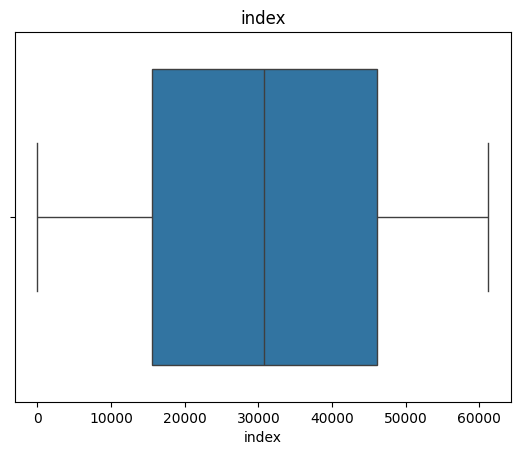

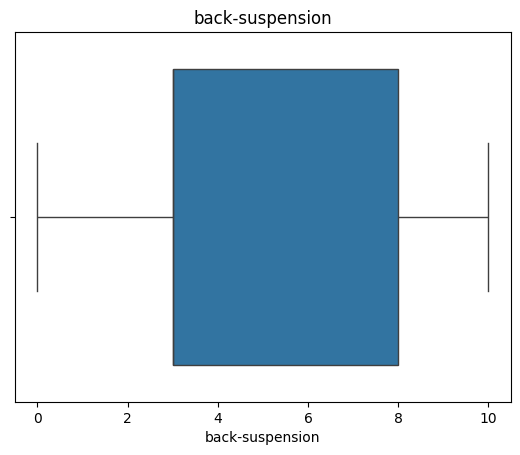

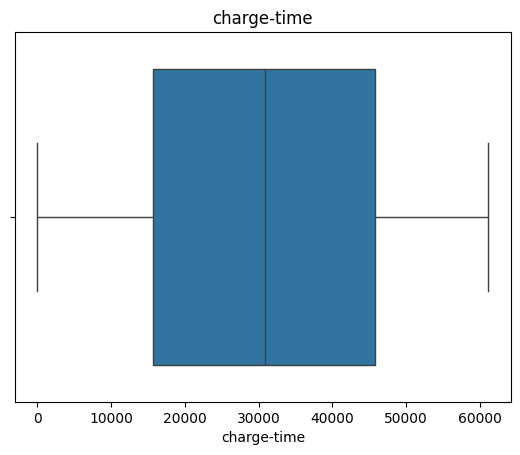

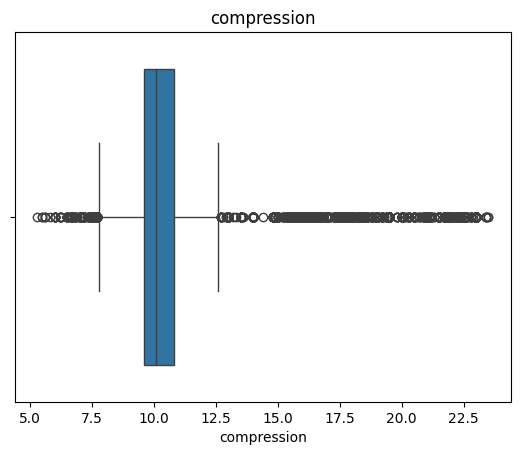

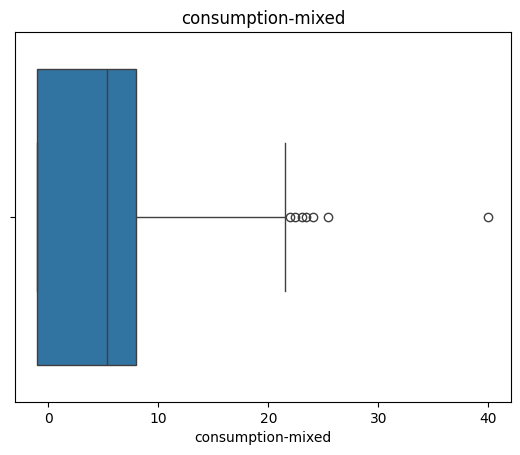

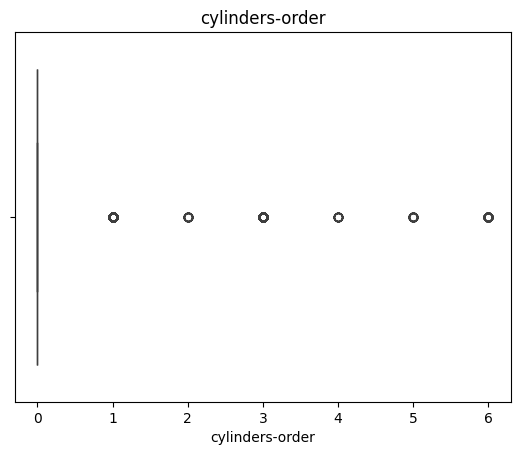

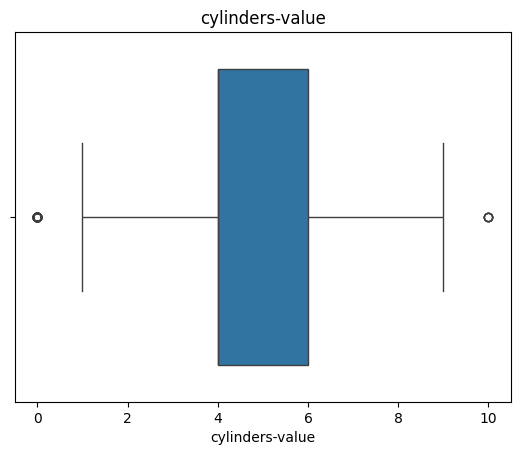

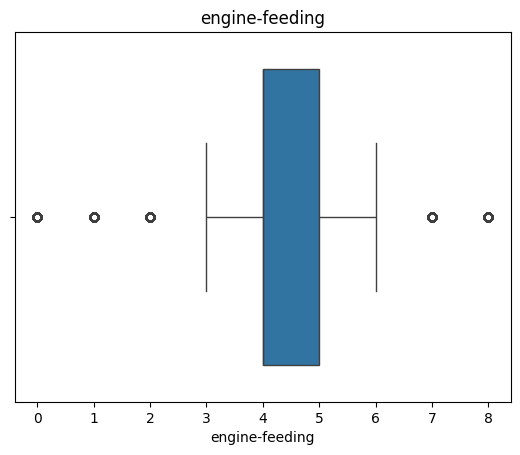

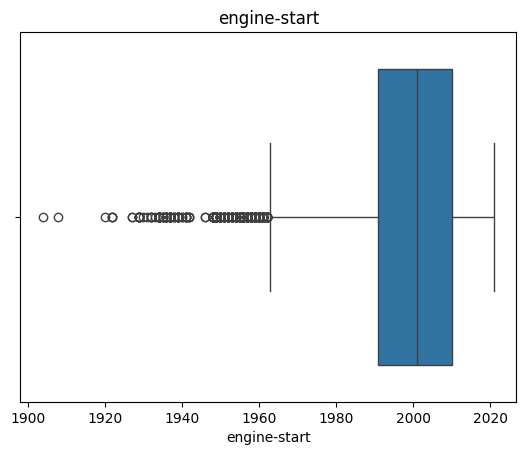

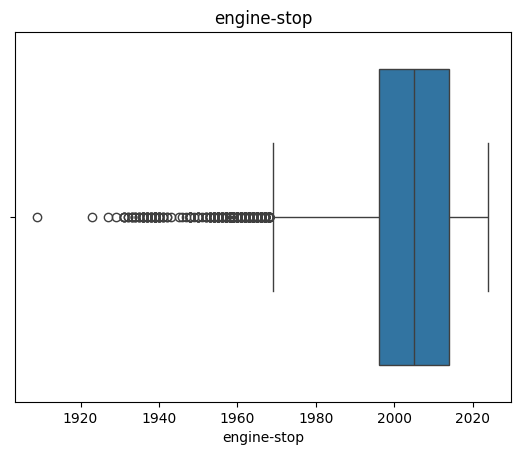

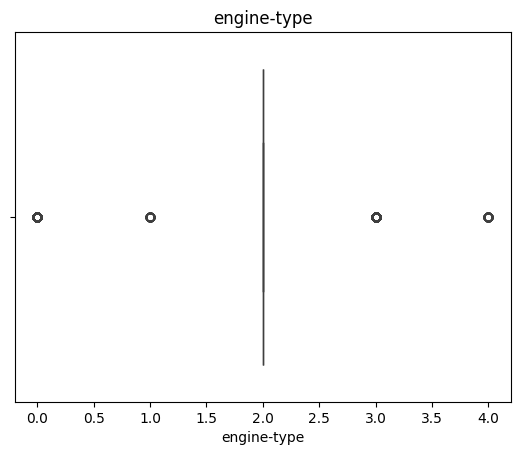

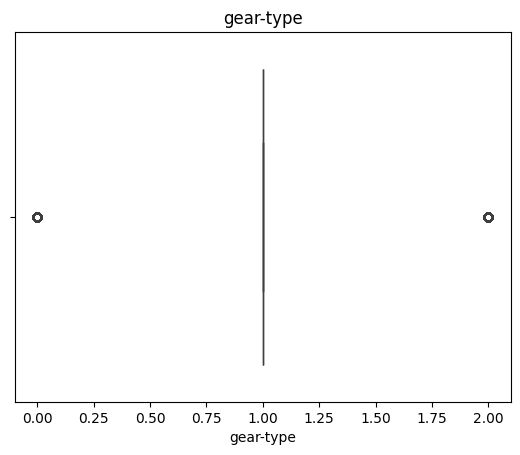

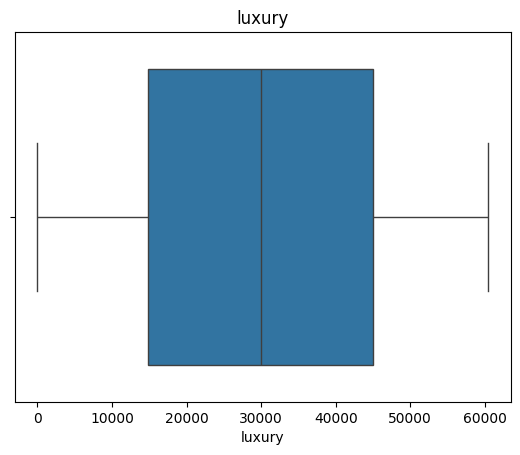

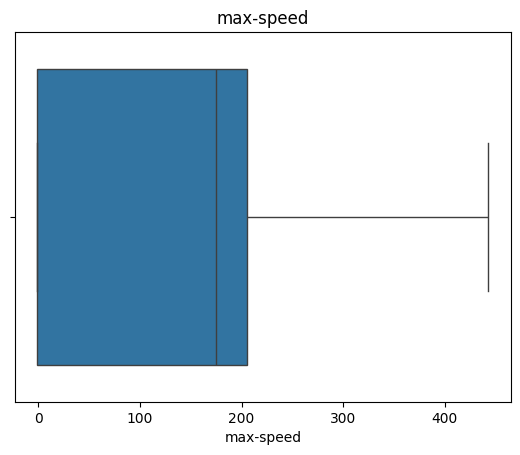

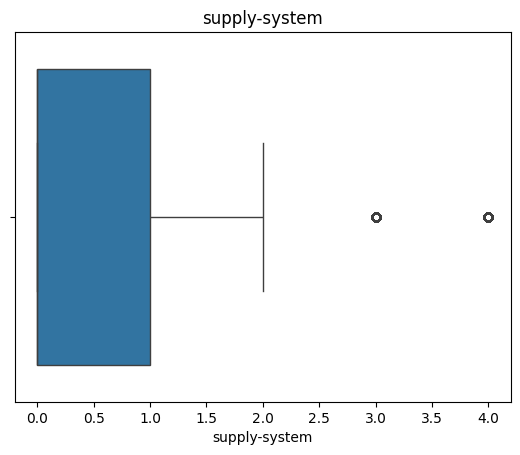

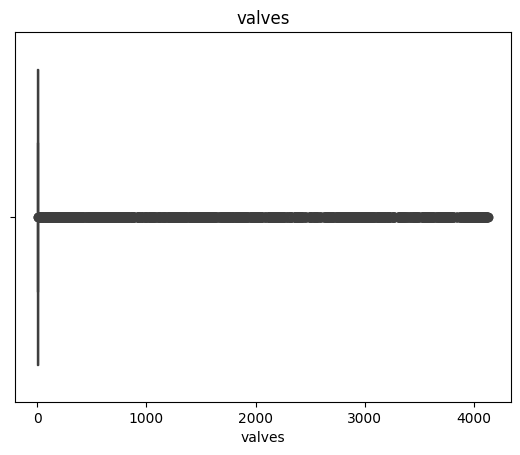

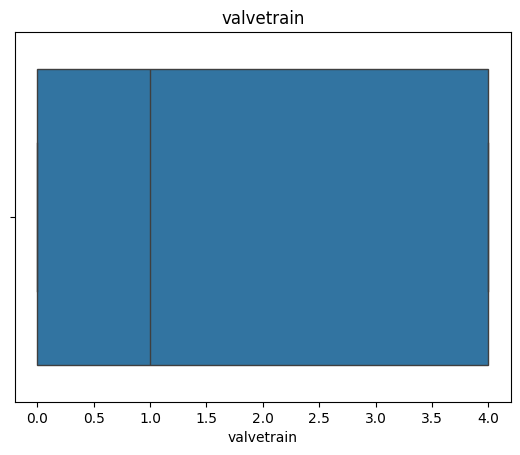

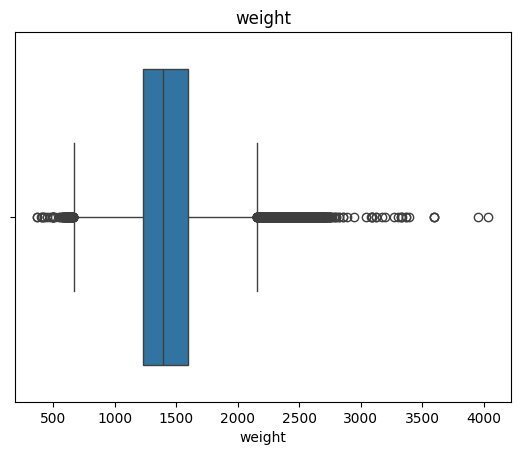

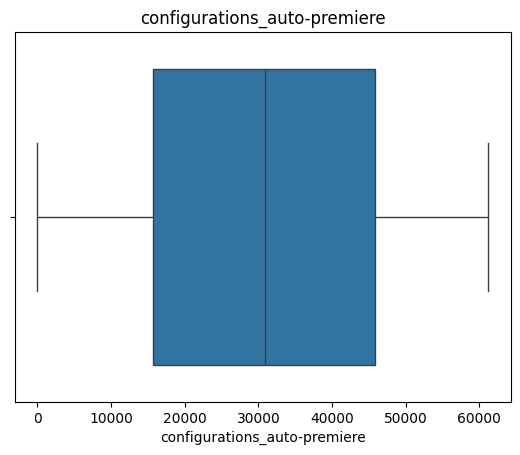

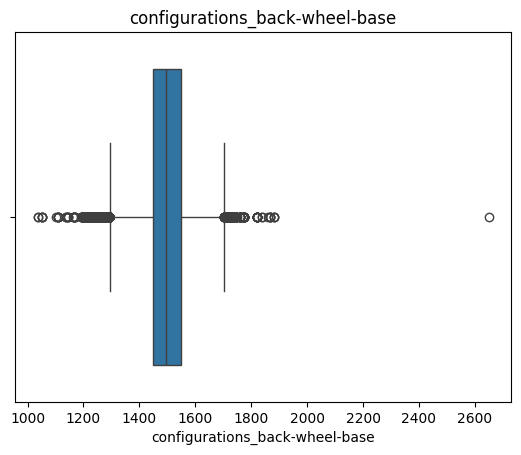

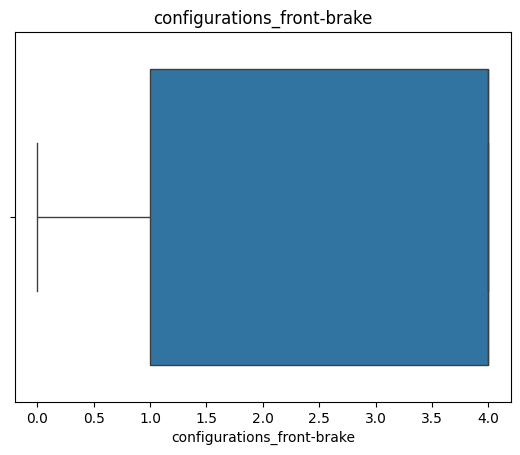

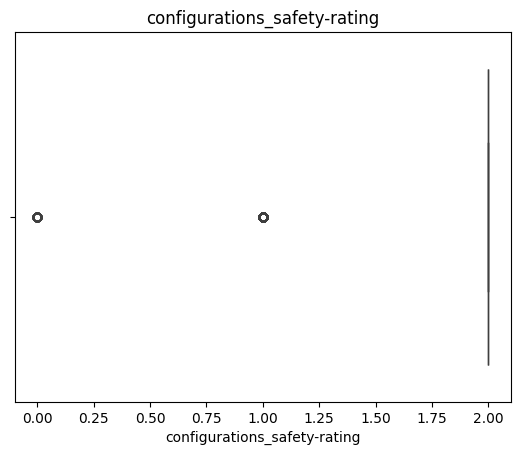

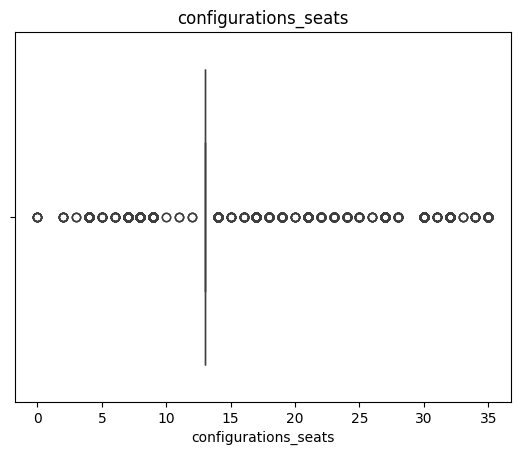

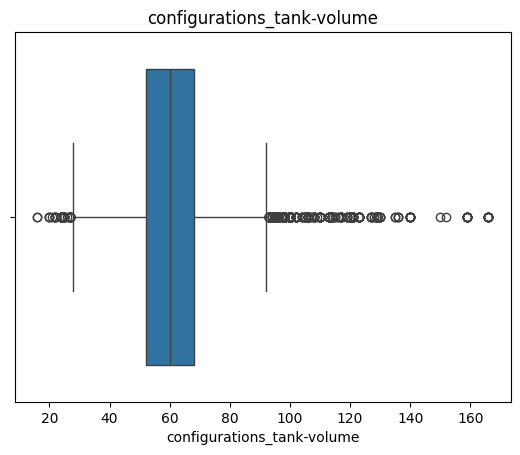

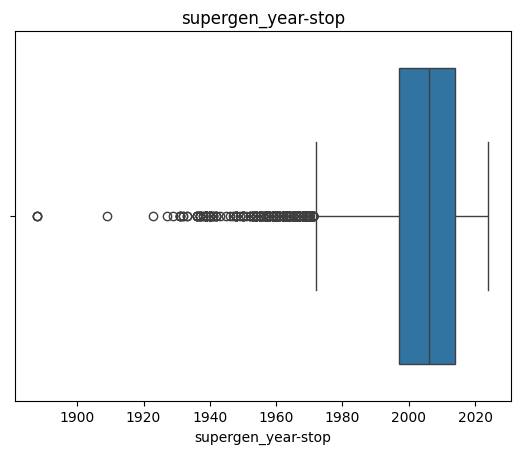

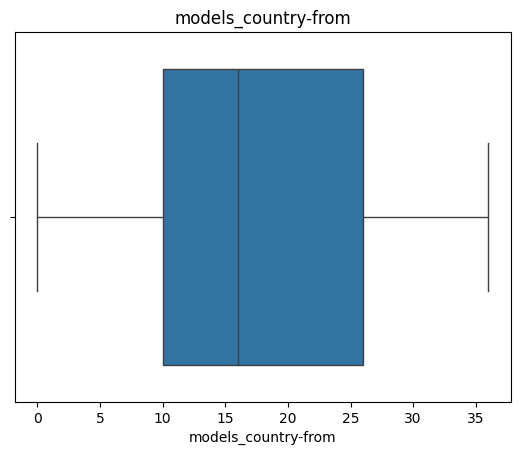

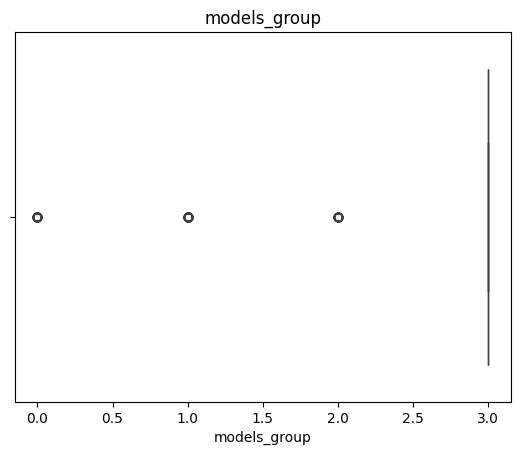

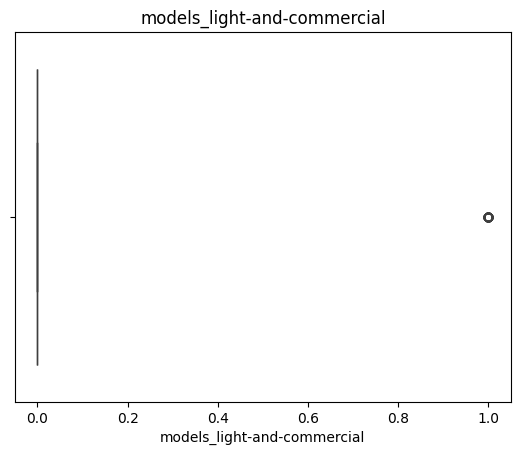

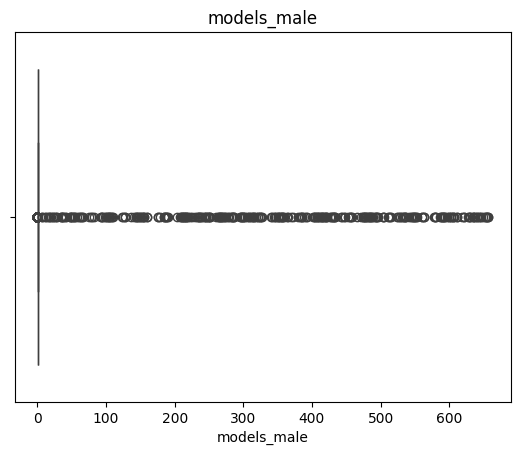

In [388]:
for elements in train_X.columns:
    sns.boxplot(x=elements, data=train_X)
    plt.title(elements)
    plt.show()

In [389]:
def ejection (col):
    q75 = np.percentile(col, 75)
    q25 = np.percentile(col, 25)
    iqr = q75 - q25
    ejection_h = q75 + 1.5*iqr
    ejection_l = q25 - 1.5*iqr
    ejection_count = col[(col > ejection_h) | (col < ejection_l)].count()
    ejection_perc = (ejection_count/len(col))*100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [390]:
for i in train_X.columns:
    print(i, ejection(train_X[i]))

index (91768.25, -30147.75, 0, 0.0)
back-suspension (15.5, -4.5, 0, 0.0)
charge-time (90869.875, -29395.125, 0, 0.0)
compression (12.600000000000001, 7.799999999999998, 5362, 18.50624698005108)
consumption-mixed (21.5, -14.5, 7, 0.024159591357769034)
cylinders-order (0.0, 0.0, 6448, 22.254435010699247)
cylinders-value (9.0, 1.0, 68, 0.23469317318975635)
engine-feeding (6.5, 2.5, 8158, 28.156278042382826)
engine-start (2038.5, 1962.5, 388, 1.3391316352591978)
engine-stop (2041.0, 1969.0, 477, 1.6463035825222614)
engine-type (2.0, 2.0, 6777, 23.38993580451439)
gear-type (1.0, 1.0, 13784, 47.5736867536412)
luxury (90169.125, -30359.875, 0, 0.0)
max-speed (514.0, -310.0, 0, 0.0)
supply-system (2.5, -1.5, 3145, 10.854559260026232)
valves (5.0, -3.0, 1995, 6.885483536964175)
valvetrain (10.0, -6.0, 0, 0.0)
weight (2152.5, 668.5, 967, 3.337474977566094)
configurations_auto-premiere (90928.5, -29441.5, 0, 0.0)
configurations_back-wheel-base (1703.0, 1295.0, 1123, 3.8758887278249463)
configurat

In [391]:
train_X['y'] = train_y
test_X['y'] = test_y

In [392]:
train_X = train_X[(train_X['consumption-mixed'] > -14.5) & (train_X['consumption-mixed'] < 21.5)]
train_X = train_X[(train_X['cylinders-value'] > 1) & (train_X['cylinders-value'] < 9)]
train_X = train_X[(train_X['engine-start'] > 1962.5) & (train_X['engine-start'] < 2038.5)]
train_X  = train_X[(train_X['engine-stop'] > 1969.0) & (train_X['engine-stop'] < 2041.0)]
train_X = train_X[(train_X['weight'] > 668.5) & (train_X['weight'] < 2152.5)]
train_X = train_X[(train_X['configurations_tank-volume'] > 28.0) & (train_X['configurations_tank-volume'] < 92.0)]
train_X = train_X[(train_X['supergen_year-stop'] > 1971.5) & (train_X['supergen_year-stop'] < 2039.5)]
train_X = train_X[(train_X['configurations_back-wheel-base'] > 1295.0) & (train_X['configurations_back-wheel-base'] < 1703.0)]
train_X = train_X[(train_X['cylinders-order'] >= 0) & (train_X['cylinders-order'] <= 3)]
train_X = train_X[(train_X['engine-feeding'] > 2) & (train_X['engine-feeding'] < 7)]
train_X = train_X[(train_X['supply-system'] < 3)]
train_X = train_X[(train_X['valves'] < 2000)]

In [393]:
test_X = test_X[(test_X['consumption-mixed'] > -14.5) & (test_X['consumption-mixed'] < 21.5)]
test_X = test_X[(test_X['cylinders-value'] > 1) & (test_X['cylinders-value'] < 9)]
test_X = test_X[(test_X['engine-start'] > 1962.5) & (test_X['engine-start'] < 2038.5)]
test_X  = test_X[(test_X['engine-stop'] > 1969.0) & (test_X['engine-stop'] < 2041.0)]
test_X = test_X[(test_X['weight'] > 668.5) & (test_X['weight'] < 2152.5)]
test_X = test_X[(test_X['configurations_tank-volume'] > 28.0) & (test_X['configurations_tank-volume'] < 92.0)]
test_X = test_X[(test_X['supergen_year-stop'] > 1971.5) & (test_X['supergen_year-stop'] < 2039.5)]
test_X = test_X[(test_X['configurations_back-wheel-base'] > 1295.0) & (test_X['configurations_back-wheel-base'] < 1703.0)]
test_X = test_X[(test_X['cylinders-order'] >= 0) & (test_X['cylinders-order'] <= 3)]
test_X = test_X[(test_X['engine-feeding'] > 2) & (test_X['engine-feeding'] < 7)]
test_X = test_X[(test_X['supply-system'] < 3)]
test_X = test_X[(test_X['valves'] < 2000)]

In [394]:
train_X['valves'].value_counts()

valves
2       12218
0        3759
1         340
3         224
4           5
        ...  
564         1
1083        1
1501        1
1508        1
644         1
Name: count, Length: 267, dtype: int64

In [395]:
list_ = ['compression', 'cylinders-order', 'engine-feeding', 'engine-type', 'gear-type', 
         'supply-system', 'valves', 'configurations_safety-rating','configurations_seats','models_male'
        ]

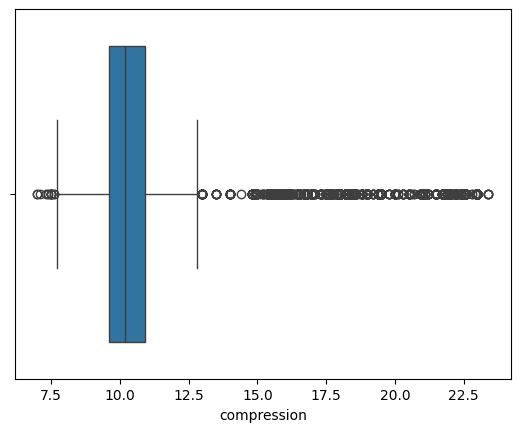

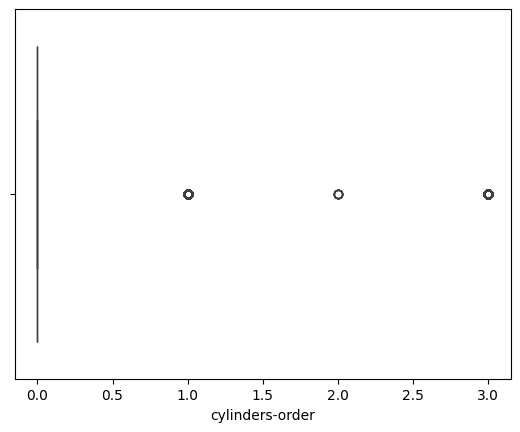

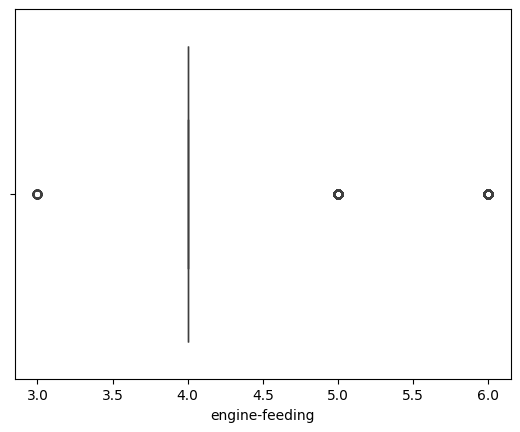

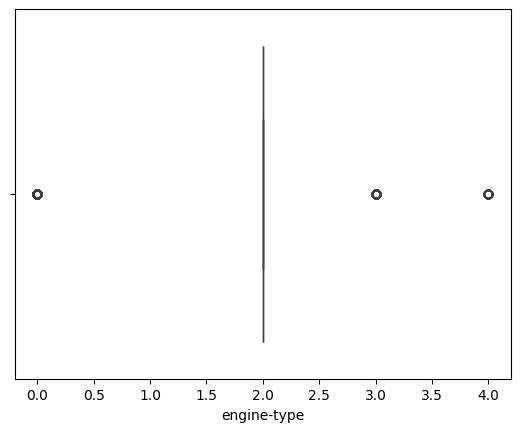

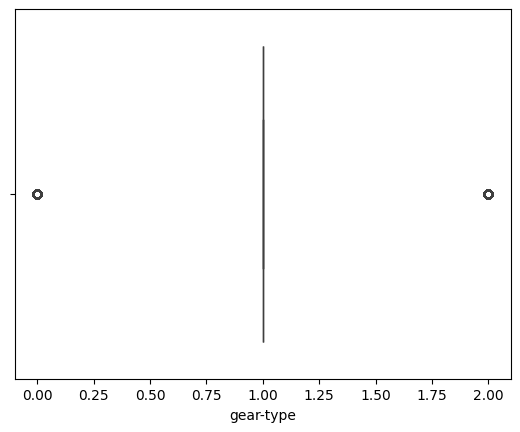

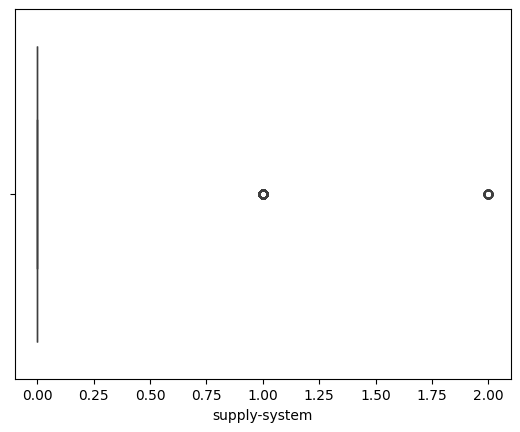

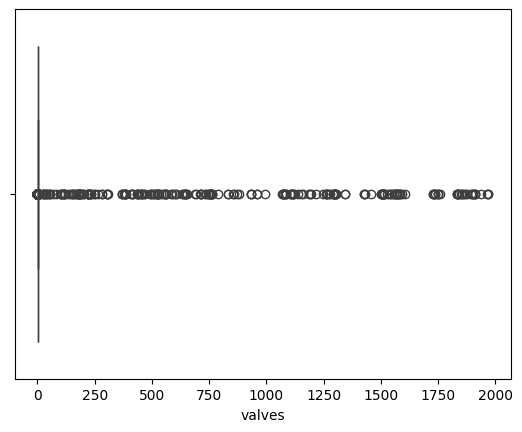

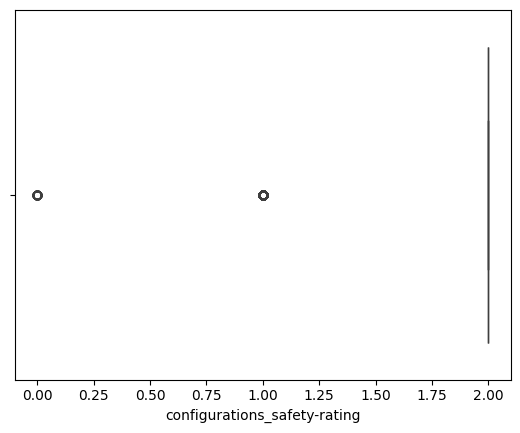

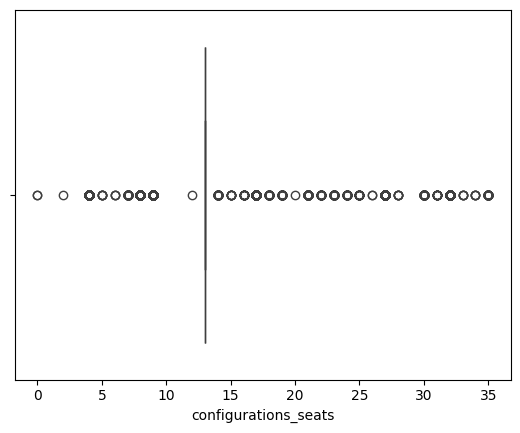

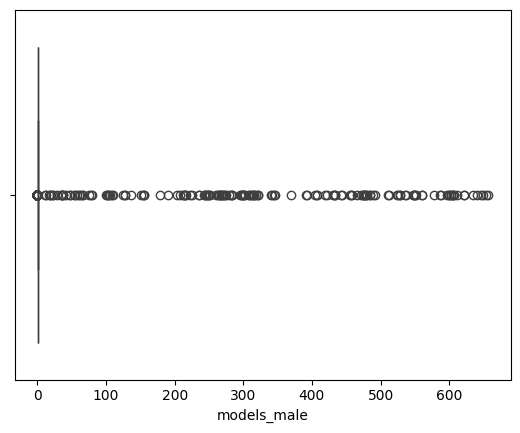

In [396]:
for elements in list_:
    sns.boxplot(x=elements, data=train_X)
    plt.show()

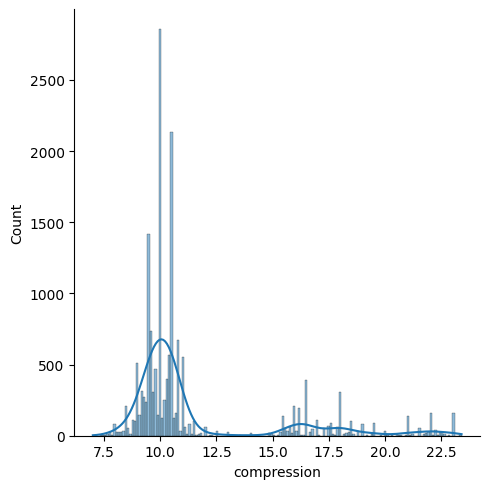

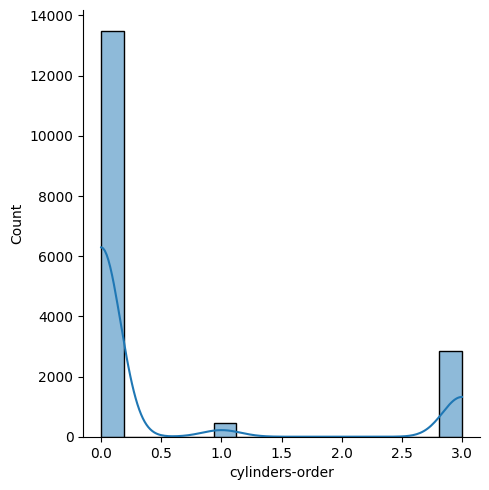

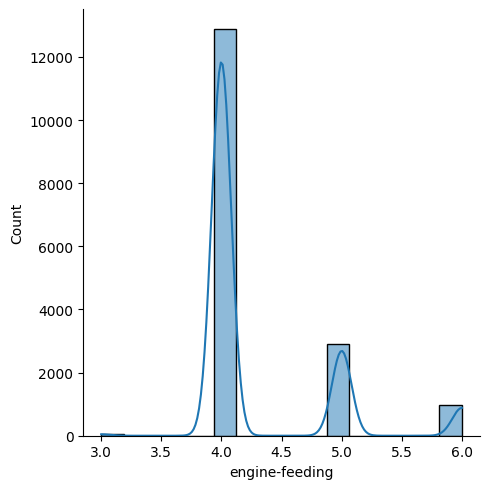

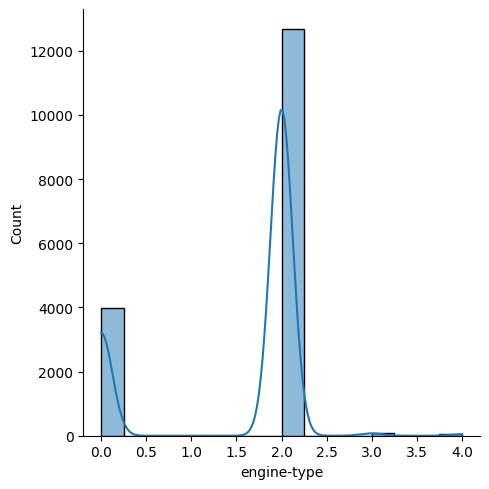

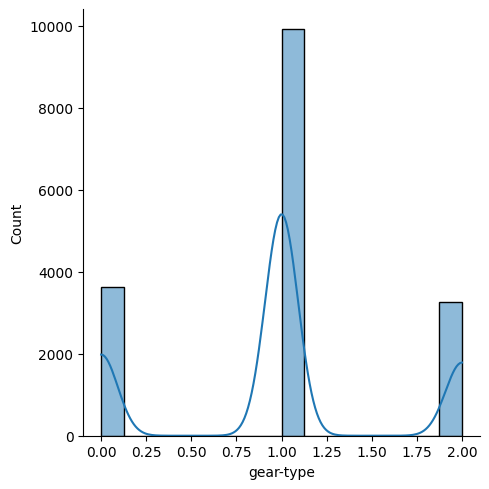

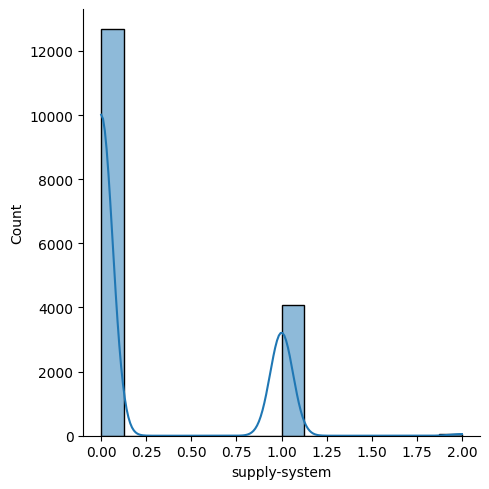

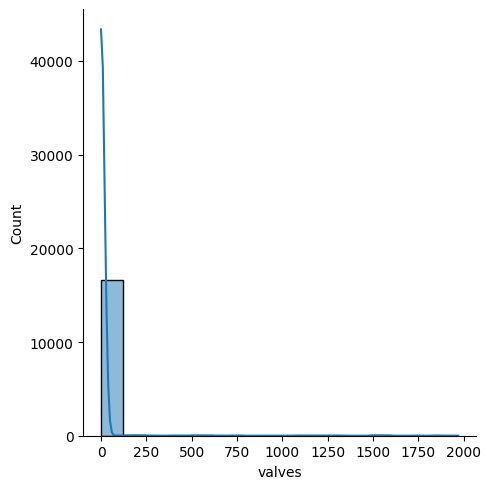

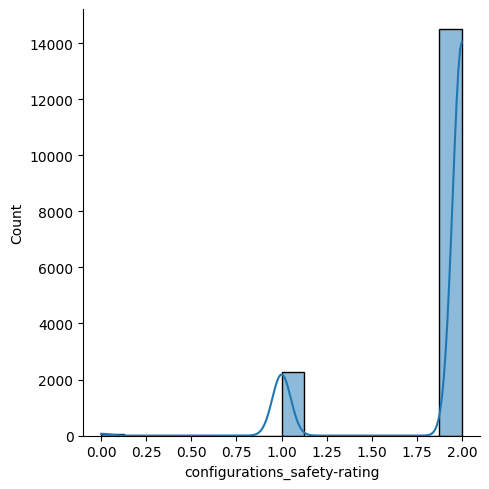

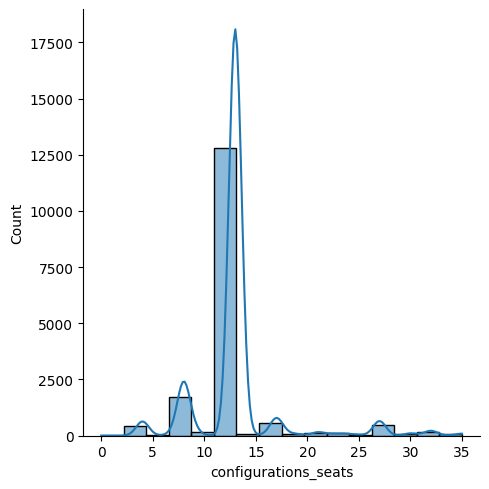

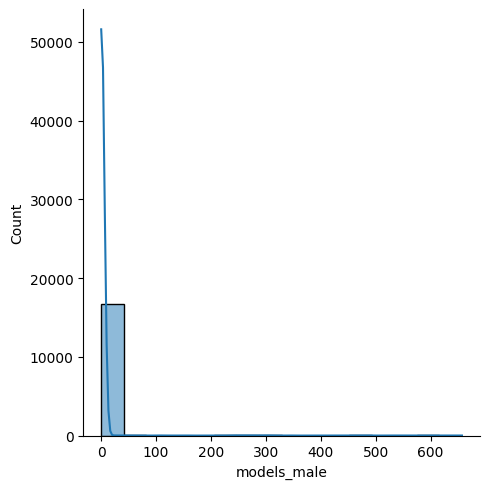

In [397]:
#
for elements in list_:
    sns.displot(train_X, x=elements, kde=True)
    plt.show()

In [398]:
train_X['compression'] = boxcox(train_X['compression'])[0]
test_X['compression'] = boxcox(test_X['compression'])[0]

In [399]:
train_X['cylinders-order'].value_counts()

cylinders-order
0    13495
3     2835
1      471
2        7
Name: count, dtype: int64

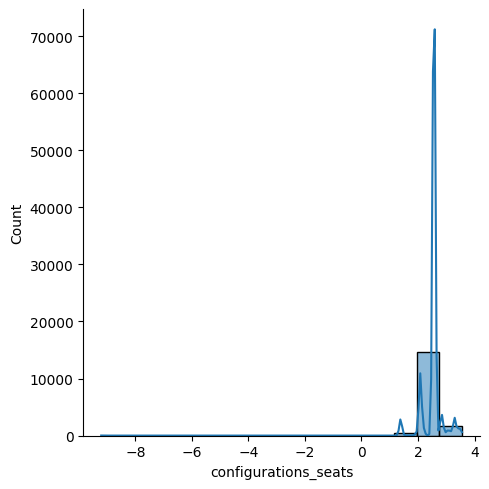

In [400]:
sns.displot(x=np.log(train_X['configurations_seats']+0.0001), kde=True)

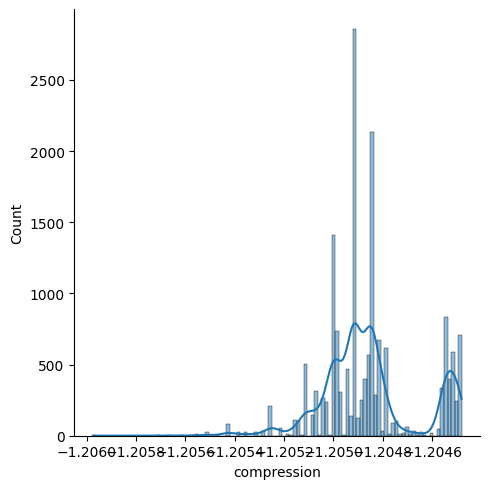

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


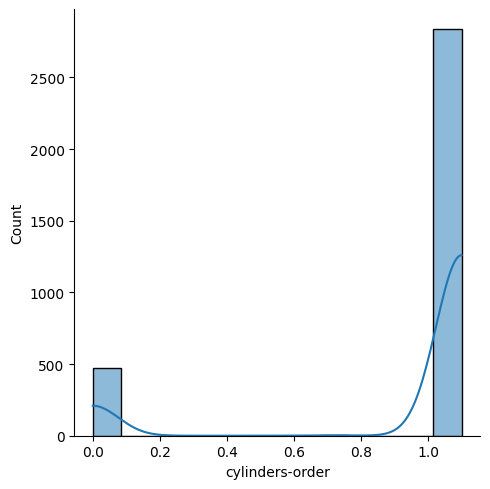

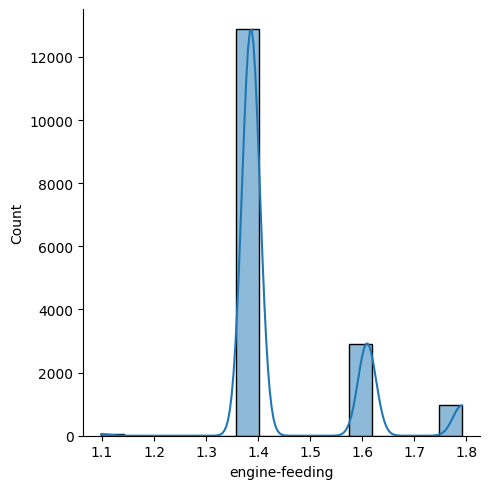

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


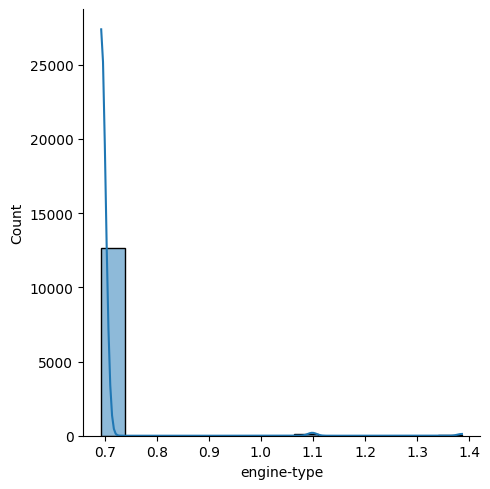

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


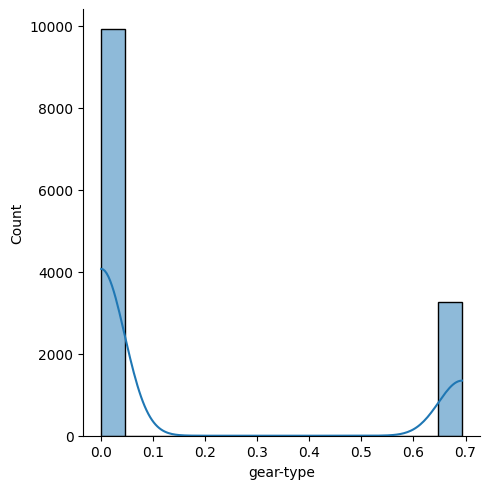

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


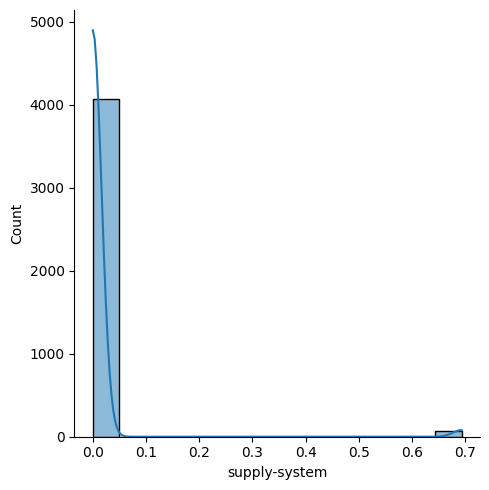

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


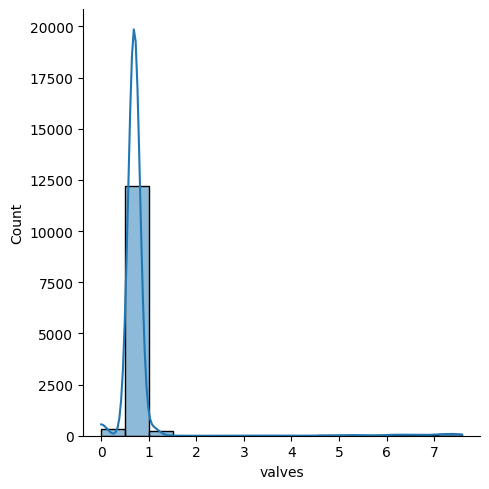

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


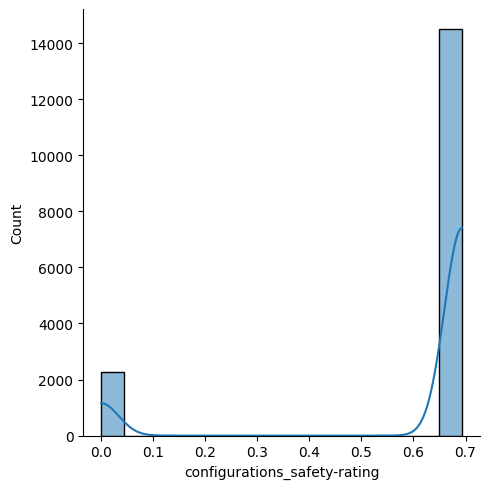

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


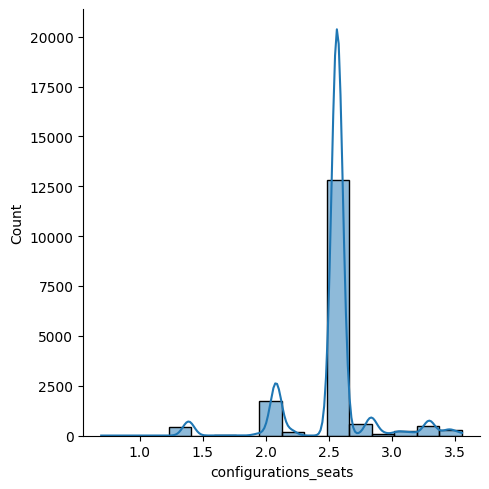

D:\papka\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


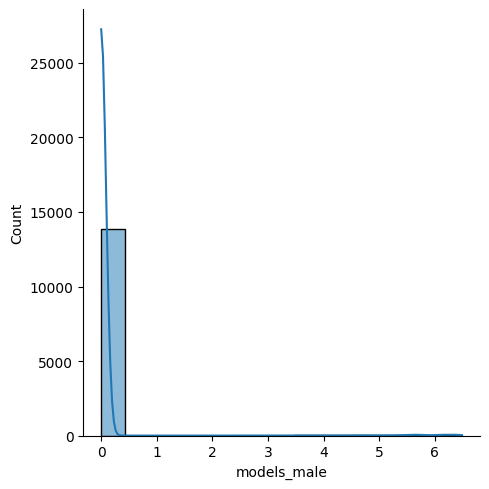

In [401]:
for elements in list_:
    sns.displot(train_X, x=np.log(train_X[elements]), kde=True)
    plt.show()

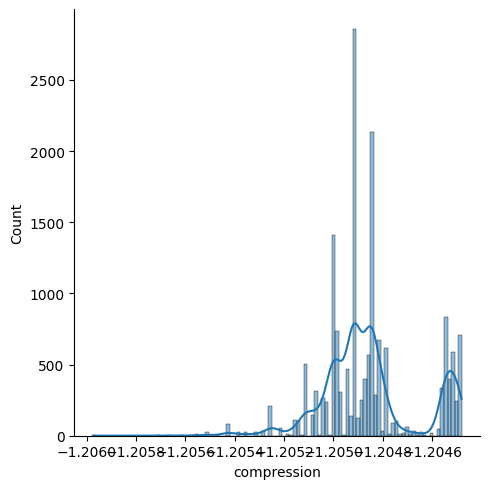

In [402]:
sns.displot(train_X, x=np.log(train_X['compression']), kde=True)

In [403]:
#Тест Шапиро-Уилка. Большинство данных не имеют нормальное распределение
for i in train_X.columns:
    sample = train_X[i]
    stat, p = st.shapiro(sample)
    alpha = 0.01
    if p < alpha:
        print('Для столбца ',i,'значение -', p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
    else:
        print('Для столбца ',i,'значение -', p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

Для столбца  index значение - 2.778865146560773e-56 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  back-suspension значение - 1.5063558146118548e-93 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  charge-time значение - 1.2697543361434969e-57 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  compression значение - 1.1072866251205293e-68 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  consumption-mixed значение - 5.210388489910015e-80 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  cylinders-order значение - 2.4273936753598074e-112 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  cylinders-value значение - 1.3457826949511968e-102 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения
Для столбца  engine-feeding значение - 7.838072600679494e-108 Отвергаем нулеву

D:\papka\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16808.
  res = hypotest_fun_out(*samples, **kwds)


In [404]:
train_y = train_X[['y']]
test_y = test_X[['y']]

In [405]:
train_X = train_X.drop(['y'], axis=1)
test_X = test_X.drop(['y'], axis=1)

In [407]:
scaler = StandardScaler()
scaler

StandardScaler()

In [408]:
st_scaler = StandardScaler().fit(train_X)

In [409]:
X_train_scaled = scaler.fit_transform(train_X)

In [410]:
train_X = pd.DataFrame(X_train_scaled, columns = train_X.columns)

In [411]:
X_test_scaled = scaler.transform(test_X)

In [412]:
test_X = pd.DataFrame(X_test_scaled, columns = test_X.columns)

In [413]:
g = train_X.join(train_y)

In [414]:
corr = round(g.corr(method='spearman'), 3)
corr.style.background_gradient(cmap="cubehelix")
corr[['y']]

,y
index,-0.013
back-suspension,0.011
charge-time,-0.017
compression,-0.004
consumption-mixed,0.003
cylinders-order,-0.006
cylinders-value,-0.010
engine-feeding,-0.001
engine-start,0.019
engine-stop,0.013


<Axes: >

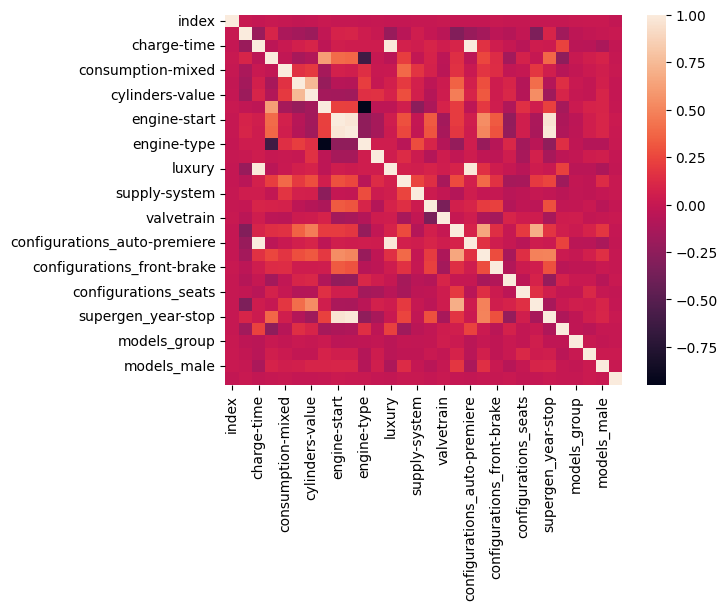

In [415]:
sns.heatmap(g.corr(method='spearman')) #с y очень небольшая корреляция у всех переменных

In [416]:
corr[corr['y']>0.01].index

Index(['back-suspension', 'engine-start', 'engine-stop', 'valvetrain',
       'configurations_safety-rating', 'supergen_year-stop',
       'models_light-and-commercial', 'y'],
      dtype='object')

In [451]:
corr[corr['y']<-0.01].index

Index(['index', 'charge-time', 'luxury', 'configurations_auto-premiere',
       'configurations_seats'],
      dtype='object')

In [418]:
train_X

,index,back-suspension,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,engine-stop,...,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male
0,0.154135,-0.462525,0.206815,-0.015849,1.858935,2.194693,1.570176,-0.500796,1.015195,1.037227,...,1.324219,0.581606,-2.384593,0.873312,1.557609,0.993938,-0.340147,0.070242,-0.053516,-0.080535
1,-0.286816,-0.462525,-0.061012,-0.749751,0.674837,-0.476186,-0.510190,-0.500796,-0.895421,-0.776790,...,-0.644257,0.581606,0.393933,-0.052040,0.018279,-0.884267,-0.229640,0.070242,-0.053516,-0.107988
2,-1.109877,-1.190951,0.397720,-1.434359,-1.198191,2.194693,1.570176,-0.500796,-0.576985,-0.575233,...,1.980377,0.581606,0.393933,3.186694,1.376511,-0.675577,1.869995,0.070242,-0.053516,-0.080535
3,0.533288,-0.462525,1.295031,-0.306890,-1.198191,-0.476186,1.570176,-0.500796,0.272177,-0.071339,...,1.234743,-1.723605,0.393933,-0.052040,1.014316,0.263525,1.869995,0.070242,-0.053516,-0.080535
4,-0.189768,-0.462525,-0.880224,-2.014665,1.923522,2.194693,1.570176,-0.500796,-1.426148,-1.381463,...,-0.867948,0.581606,0.393933,-0.052040,0.471023,-1.510335,-0.229640,0.070242,-0.053516,-0.080535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16803,0.622774,-0.462525,1.063873,-0.749751,-1.198191,-0.476186,-0.510190,-0.500796,-0.046259,-0.172118,...,-0.256527,0.581606,0.393933,-0.052040,0.199377,-0.258199,-0.892683,0.070242,-0.053516,-0.080535
16804,-1.556286,-0.462525,-1.399139,0.487734,-1.198191,0.414107,1.570176,-0.500796,0.484468,0.230997,...,0.802274,0.581606,0.393933,-1.208731,0.471023,0.263525,-0.892683,0.070242,-0.053516,-0.080535
16805,-1.660782,-0.462525,0.963550,-0.749751,-1.198191,-0.476186,-0.510190,-0.500796,-0.364695,-0.474454,...,0.101378,-1.723605,0.393933,-0.052040,0.018279,-0.571233,0.875431,0.070242,-0.053516,-0.080535
16806,-1.104987,-0.462525,1.394626,1.662419,0.179669,-0.476186,-0.510190,1.256486,1.439776,1.843458,...,1.682123,0.581606,-2.384593,3.186694,0.923767,1.828696,1.869995,0.070242,-0.053516,-0.080535


In [452]:
train_X_0 = train_X[['back-suspension', 'engine-start', 'engine-stop', 'valvetrain', 'configurations_safety-rating', 'supergen_year-stop','models_light-and-commercial', 'charge-time', 'luxury', 
                     'configurations_auto-premiere', 'configurations_seats']]

In [453]:
test_X_0 = test_X[['back-suspension', 'engine-start', 'engine-stop', 'valvetrain', 'configurations_safety-rating', 'supergen_year-stop','models_light-and-commercial', 'charge-time', 'luxury', 'configurations_auto-premiere',
       'configurations_seats']]

In [454]:
reg = LinearRegression().fit(train_X, train_y)

In [455]:
perm = PermutationImportance(reg, random_state=5).fit(test_X, test_y)

In [456]:
eli5.show_weights(perm, feature_names=list(test_X.columns))

Weight,Feature
0.2025 ± 0.0141,configurations_tank-volume
0.0773 ± 0.0043,configurations_back-wheel-base
0.0668 ± 0.0060,weight
0.0468 ± 0.0014,configurations_seats
0.0330 ± 0.0013,gear-type
0.0306 ± 0.0017,engine-stop
0.0223 ± 0.0026,engine-type
0.0099 ± 0.0018,luxury
0.0084 ± 0.0018,configurations_auto-premiere
0.0084 ± 0.0008,max-speed


## Baseline

In [457]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [458]:
reg = LinearRegression().fit(train_X_0, train_y)

In [459]:
reg.score(train_X_0, train_y)

0.19483269295982641

In [460]:
reg.score(test_X_0, test_y)

0.19973648800693367

In [461]:
mean_squared_error(reg.predict(train_X_0), train_y)

30444.797355008228

In [462]:
scores = cross_validate(reg, train_X_0, train_y, cv=3, scoring='neg_mean_squared_error')

In [463]:
scores

{'fit_time': array([0.05603838, 0.01564407, 0.01562452]),
 'score_time': array([0.00703073, 0.        , 0.        ]),
 'test_score': array([-29686.04529745, -31005.24284177, -30790.89580339])}

In [464]:
mean_squared_error(reg.predict(test_X_0), test_y)

30489.34495697094